# Gradient Descent

In this demo, we try to showcase the use of a gradient-based optimizer to estimate a linear function. Specifically, we will be using the Gradient Descent algorithm.

## Function

First, we define our function and generate our data.

In [1]:
import numpy as np

def gen_noise(y):
    """
    Adds random noise.
    
    Input/s:
        y       : data to add noise to
        
    Output/s:
        y_noisy : noisy y
    """
    mean, std = 0, 5.0

    noise = np.random.normal(mean, std, y.shape)
    y_noisy = y + noise
    return y_noisy
    

def fcn(x, coeffs, add_noise=False):
    """
    Given x, solves for y given x and coefficients
    
    Input/s:
        x         : ndarray of input data
        coeffs    : polynomial coefficients
        add_noise : True if we wish to add noise (default: False)
        
    Output/s:
        y         : output after evaluating function f(x) = c[0] + c[1]x + c[2]x^2
    """
    
    assert(len(coeffs) == 3)
    
    y = coeffs[0] + coeffs[1]*x + coeffs[2]*x**2
    if add_noise:
        y = gen_noise(y)
    return y

We try to use the same functions and coefficients as our [MLE demo here](https://github.com/izzajalandoni/Deep-Learning-Helper/tree/main/Machine_Learning/LinearRegression/MLE.ipynb). Overall, our function should be this:

$$
f(x) = c_0 + c_1x + c_2x^2
$$

<center>
where $c = [c_0, c_1, c_2] = [0.48813504, 2.15189366, 1.02763376]$
</center>

In [2]:
x_train = np.random.uniform(-10, 10, [50,1])

np.random.seed(0)
coeffs = np.random.uniform(-5, 5, [3,1])
print(coeffs)

[[0.48813504]
 [2.15189366]
 [1.02763376]]


In [3]:
y_train = fcn(x_train, coeffs, add_noise=True)

We visualize our data.

In [4]:
from matplotlib import pyplot as plt

def plotter(data, label=['train']):
    """ Plots data. """
    
    for d,l in zip(data, label):
        x, y = d
        plt.scatter(x, y, label=l)
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    plt.show()

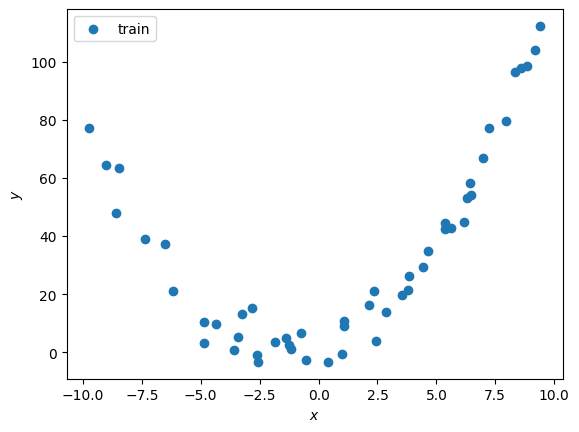

In [5]:
plotter([[x_train, y_train]])

We define our test data.

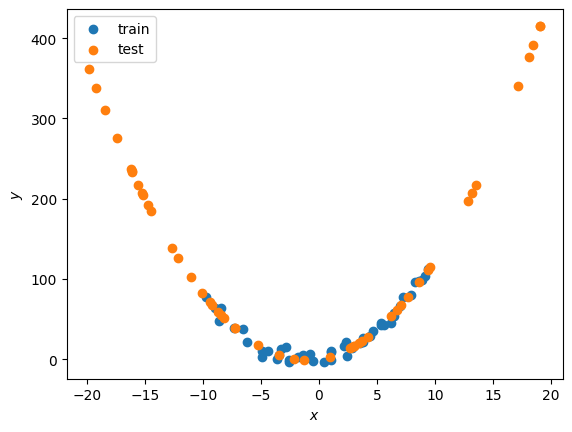

In [6]:
x_test = np.random.uniform(-20, 20, [50,1])
y_test = fcn(x_test, coeffs, add_noise=False)

plotter([[x_train, y_train],[x_test, y_test]], label=['train', 'test'])

## Training with Gradient Descent

We define our loss function. In this example, we will be using MSE.

$$
MSE = \frac{1}{n}\sum_i(y_{pred}-y_{GT})^2
$$

In [7]:
def calc_loss(y_pred, y_gt):
    """
    Calculate the MSE loss
    
    Input/s:
        y_pred : predicted y of model
        y_gt   : ground truth y
    """
    mse = ((y_pred-y_gt)**2).mean()
    return mse

The reason we define the loss first is because remember gradient is:

$$
\nabla L(\theta) = \frac{\delta L}{\delta\theta} 
$$

In this example, the coefficients are our parameters. Hence, we have to evaluate the partial derivate of our function wrt our parameters (coefficients).

In [8]:
def calc_gradient(params, x, y_gt):
    """
    Calculates the gradient.
    
    Input/s:
        params : coefficients initialized randomly
        x      : ndarray of input data
        y_gt   : ground truth y
    
    """
    y_pred = fcn(x, params, add_noise=False)
    y_diff = y_pred - y_gt
    
    dL_c0 = (2*y_diff).mean()
    dL_c1 = (2*x*y_diff).mean()
    dL_c2 = (2*x**2*y_diff).mean()
    
    dL_cs = np.array([dL_c0, dL_c1, dL_c2])
    return dL_cs

After calculating our gradient, we update our parameters:

$$
\theta_{n} = \theta_{n-1} - \eta\nabla L(\theta)
$$

<center>
where $\eta$ is our learning rate 
</center>

In [9]:
def update_params(params, grads, lr=0.001):
    """
    Updates our parameters.
    
    Input/s:
        params : coefficients initialized randomly
        grads  : ndarray of gradients
        lr     : learning rate
    """
    new_params = params - lr*grads
    return new_params

With our functions set, let us define our hyperparameters

In [10]:
np.random.seed(1)
c_preds = np.random.uniform(-10, 10, 3)
lr = 0.0001
max_epoch = 5000 

Our main training loop:

In [11]:
from tqdm import tqdm

for epoch in tqdm((range(max_epoch))):
    grads = calc_gradient(c_preds, x_train, y_train)
    c_preds = update_params(c_preds, grads, lr=lr)
    y_pred = fcn(x_train, c_preds, add_noise=False)
    loss = calc_loss(y_pred, y_train)
    
print(f"Predicted coeffs: {c_preds.reshape(1,-1)}\nGround truth: {coeffs.reshape(1,-1)}")
print(f"Final train loss: {loss}")

100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 27266.69it/s]

Predicted coeffs: [[-0.36525122  2.22072021  1.03995634]]
Ground truth: [[0.48813504 2.15189366 1.02763376]]
Final train loss: 28.0687755472758


We evaluate with our test data.

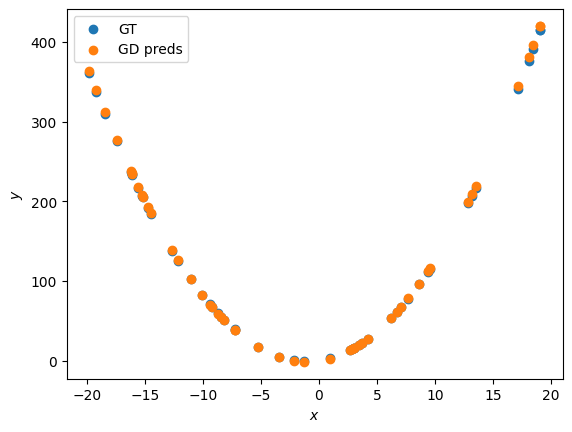

In [12]:
y_pred = fcn(x_test, c_preds, add_noise=False)
plotter([[x_test, y_test],[x_test, y_pred]], label=['GT', 'GD preds'])

In [13]:
test_loss = calc_loss(y_pred, y_test)
print(f"Test loss: {test_loss}")

Test loss: 3.1809736129490407


**Gradient Descent vs SGD**

What is the difference between Gradient Descent and SGD?

Essentially, notice in our demo above, we utilized the _entire_ dataset in each training iteration (epoch). In SGD, we randomly (stochastically) select a _batch_ of data in each training iteration.

A clear example of SGD is the one shown in our deep learning [demo here](https://github.com/izzajalandoni/Deep-Learning-Helper/blob/main/Deep_Learning/BuildingBlocks/mlp_demo.ipynb). Notice in `cell [13]` that we performed the optimization step on an inner loop that only considers _a batch of_ data, instead of the entire dataset.